### Библиотеки

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Данные

In [116]:
df = pd.read_csv('data_after_processing.csv', encoding='utf-8',)

### Первый взгляд

In [117]:
print(df.shape)
print(df.info())
display(df.head())

(3190, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3190 entries, 0 to 3189
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   price                                      3190 non-null   int64  
 1   avg_rating                                 3190 non-null   float64
 2   cnt_reviews                                3190 non-null   int64  
 3   pages_cnt                                  3190 non-null   int64  
 4   tirage                                     3190 non-null   int64  
 5   weight                                     3190 non-null   float64
 6   author_Джейн Остен                         3190 non-null   float64
 7   author_Джек Лондон                         3190 non-null   float64
 8   author_Джордж Оруэлл                       3190 non-null   float64
 9   author_Другой                              3190 non-null   float64
 10  author_Лев То

,price,avg_rating,cnt_reviews,pages_cnt,tirage,weight,author_Джейн Остен,author_Джек Лондон,author_Джордж Оруэлл,author_Другой,...,reading_age_12+,reading_age_16+,reading_age_18+,reading_age_6+,is_russian_author_0,is_russian_author_1,thickness,width,length,volume
0,312,4.1,925,512,30000,250.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.1,11.5,18.0,434.700
1,312,4.1,1341,320,30000,200.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.4,11.5,18.0,496.800
2,284,4.5,363,192,25000,132.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.5,11.5,18.0,310.500
3,339,4.3,872,288,12000,209.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.8,11.5,18.0,372.600
4,284,4.2,3004,320,30000,200.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.6,11.4,17.9,326.496


### Пропуски

In [118]:
print("\nПропуски по столбцам:")
print(df.isnull().sum().sort_values(ascending=False))


Пропуски по столбцам:
price                                        0
reading_age_0+                               0
publication_year_2022                        0
publication_year_2023                        0
publication_year_2024                        0
publication_year_2025                        0
publication_year_Другой                      0
cover_type_Мягкий заламинированный картон    0
cover_type_Мягкий переплёт                   0
cover_type_Твёрдый переплёт                  0
reading_age_12+                              0
avg_rating                                   0
reading_age_16+                              0
reading_age_18+                              0
reading_age_6+                               0
is_russian_author_0                          0
is_russian_author_1                          0
thickness                                    0
width                                        0
length                                       0
publication_year_2021                

### Describe

In [119]:
numeric_cols = ['price', 'avg_rating', 'cnt_reviews', 'pages_cnt', 'tirage', 
                'weight', 'thickness', 'width', 'length', 'volume']

for col in numeric_cols:
    df[f'log_{col}'] = np.log(df[col])

log_numeric_cols = [f'log_{col}' for col in numeric_cols]

display(df[numeric_cols].describe().T)

display(df[log_numeric_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
price,3190.0,535.249530,337.896821,104.000,299.0,384.500,671.000,3771.0
avg_rating,3190.0,4.365580,0.379632,2.500,4.1,4.300,4.700,5.0
cnt_reviews,3190.0,75.072100,133.441100,1.000,10.0,37.000,88.000,3004.0
pages_cnt,3190.0,466.561129,221.213618,80.000,320.0,416.000,560.000,2144.0
tirage,3190.0,4056.457680,2864.790801,400.000,3000.0,3000.000,4000.000,30000.0
weight,3190.0,374.346082,232.226959,10.000,230.0,310.000,436.000,2070.0
thickness,3190.0,2.445768,0.887663,0.600,1.8,2.300,2.900,9.5
width,3190.0,12.592539,1.390721,0.100,11.5,12.500,13.200,27.5
length,3190.0,19.481254,1.681390,2.400,18.0,19.900,20.600,41.7
volume,3190.0,620.904312,306.693851,6.402,414.0,554.295,739.782,3135.0


,count,mean,std,min,25%,50%,75%,max
log_price,3190.0,6.140267,0.502515,4.644391,5.700444,5.951902,6.508769,8.235095
log_avg_rating,3190.0,1.469940,0.087613,0.916291,1.410987,1.458615,1.547563,1.609438
log_cnt_reviews,3190.0,3.417939,1.447339,0.000000,2.302585,3.610918,4.477337,8.007700
log_pages_cnt,3190.0,6.049901,0.431099,4.382027,5.768321,6.030685,6.327937,7.670429
log_tirage,3190.0,8.170552,0.482694,5.991465,8.006368,8.006368,8.294050,10.308953
log_weight,3190.0,5.776516,0.529236,2.302585,5.438079,5.736572,6.077642,7.635304
log_thickness,3190.0,0.834741,0.343410,-0.510826,0.587787,0.832909,1.064711,2.251292
log_width,3190.0,2.526135,0.139401,-2.302585,2.442347,2.525729,2.580217,3.314186
log_length,3190.0,2.965122,0.101371,0.875469,2.890372,2.990720,3.025291,3.730501
log_volume,3190.0,6.325999,0.458492,1.856610,6.025866,6.317697,6.606354,8.050384


### Гистограммы

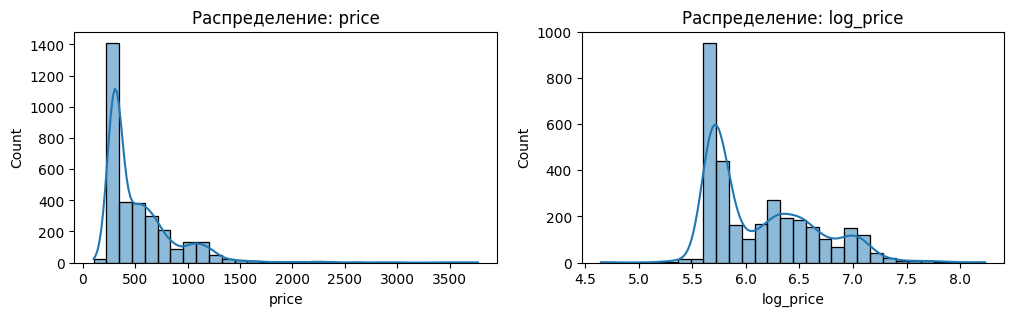

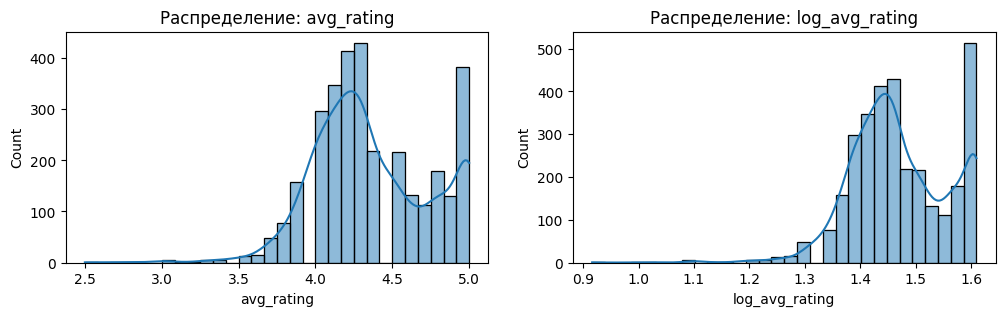

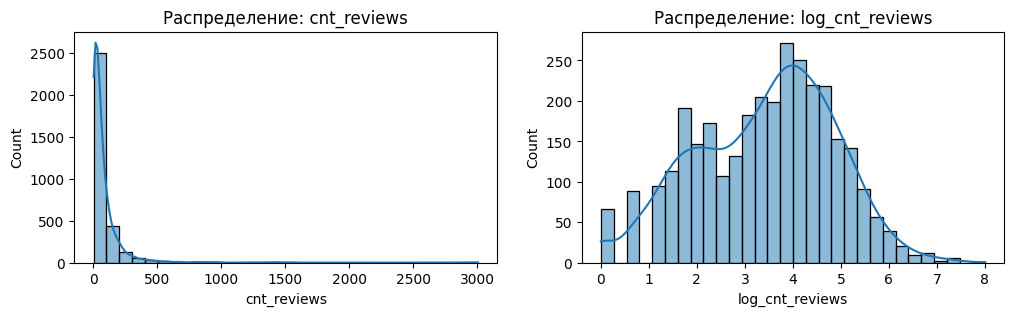

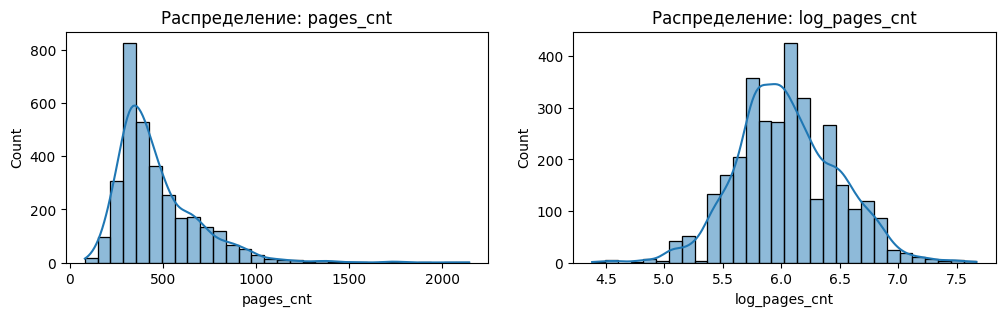

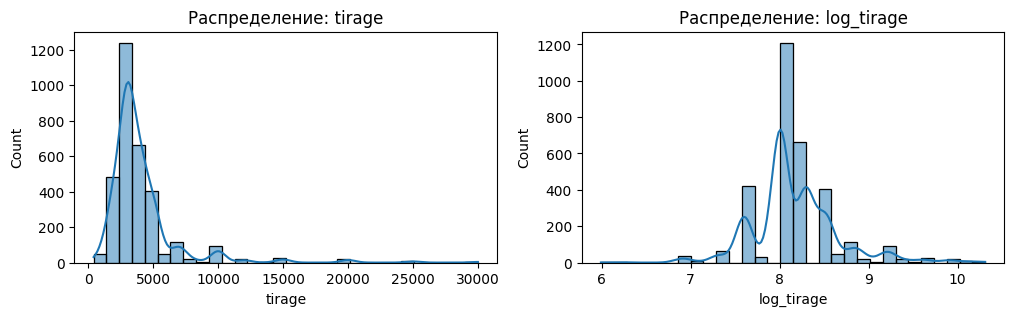

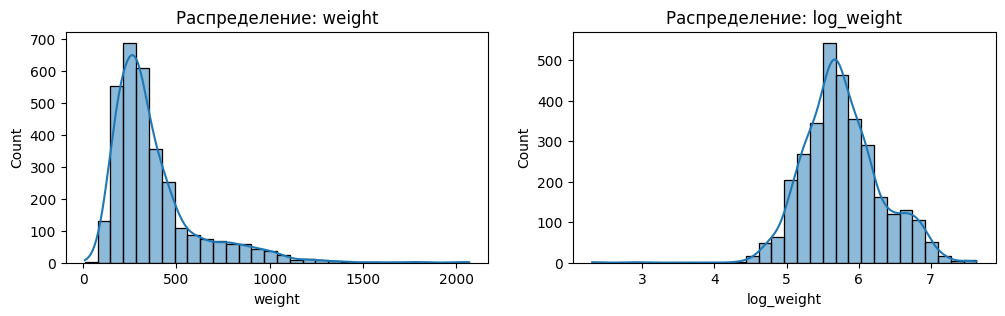

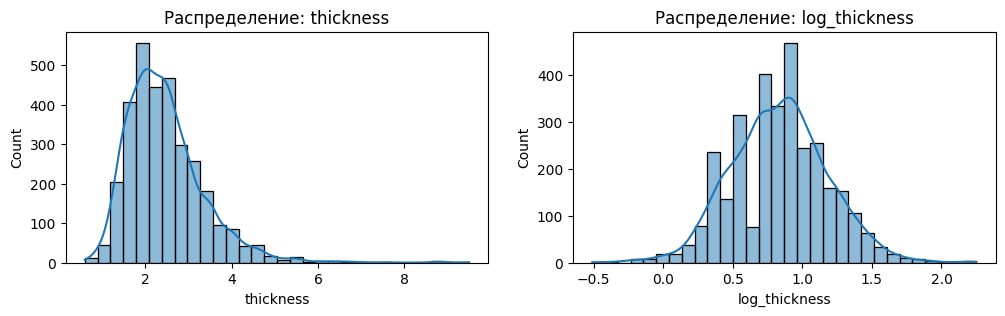

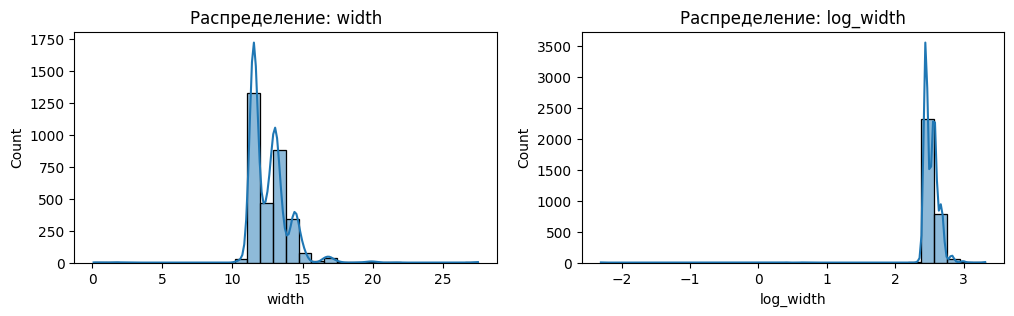

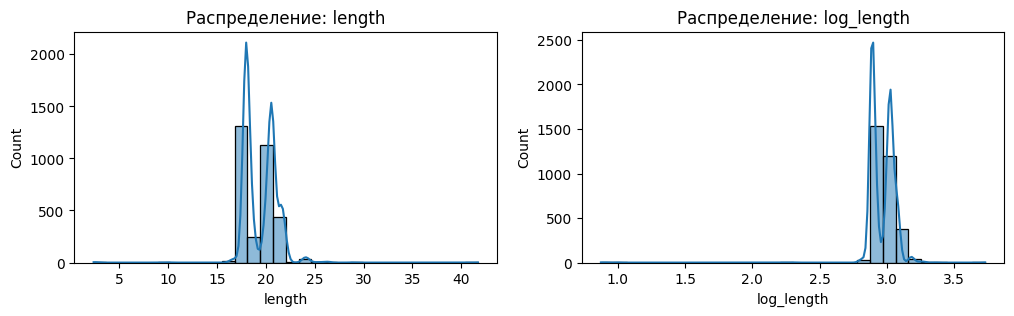

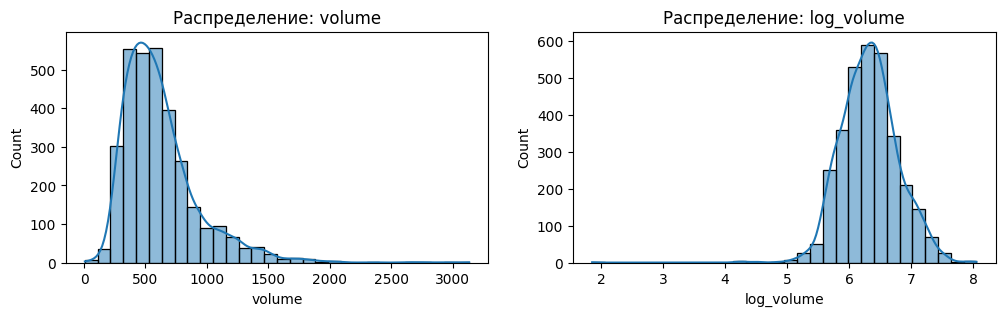

In [120]:
for col, log_col in zip(numeric_cols, log_numeric_cols):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

    ax[0].set_title(f'Распределение: {col}')
    sns.histplot(df[col], bins=30, kde=True, ax=ax[0])

    ax[1].set_title(f'Распределение: {log_col}')
    sns.histplot(df[log_col], bins=30, kde=True, ax=ax[1])
    
    plt.show()

### Боксплоты для выбросов

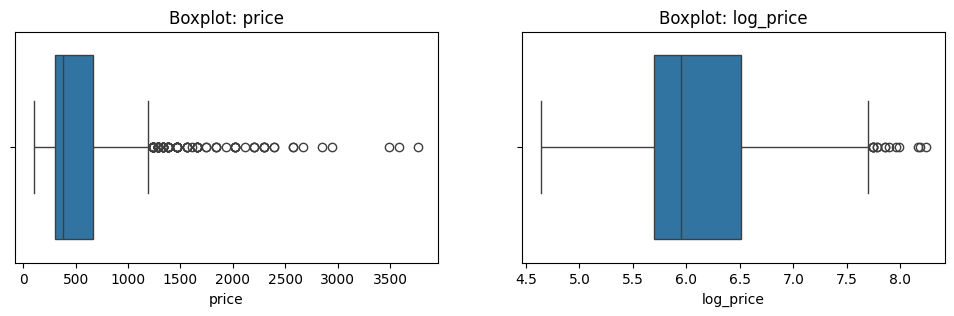

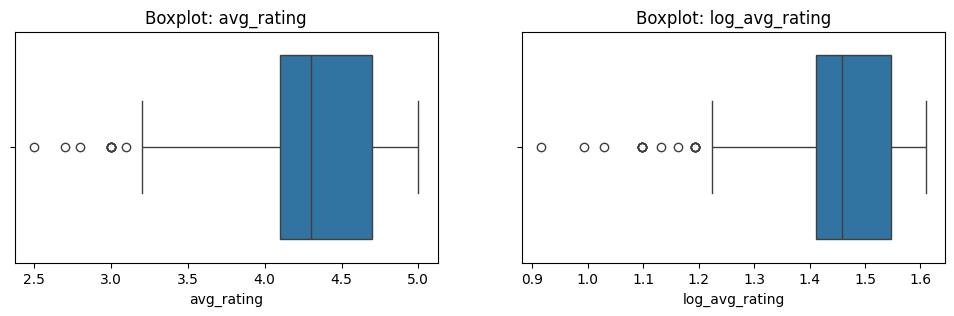

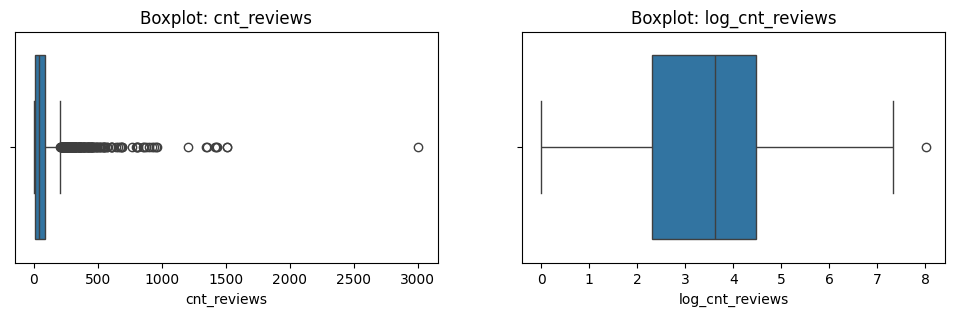

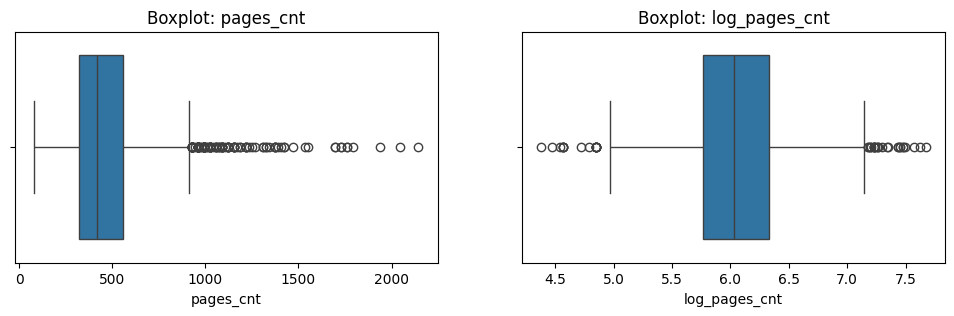

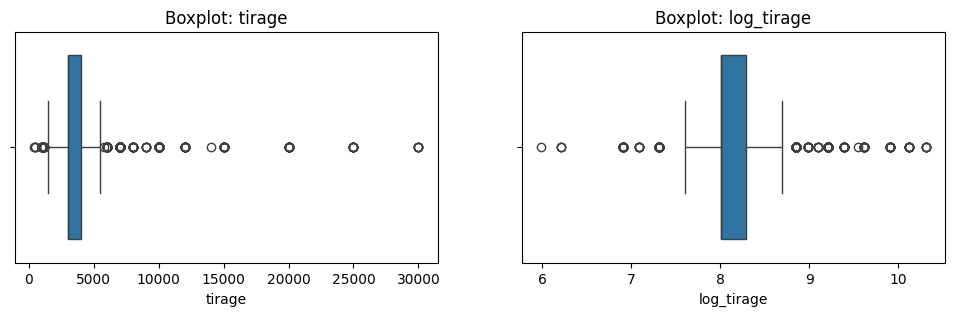

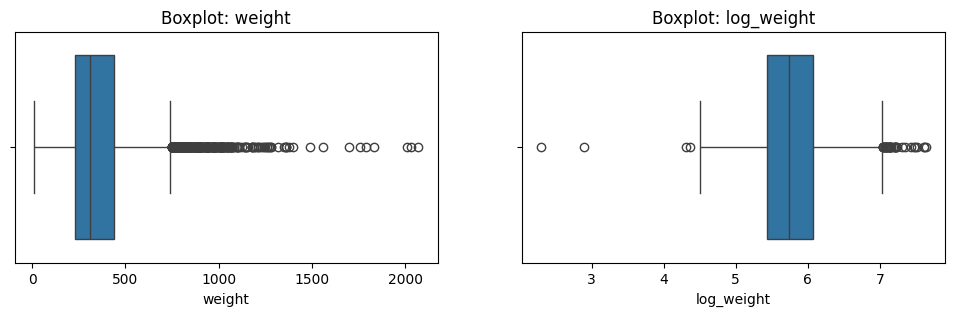

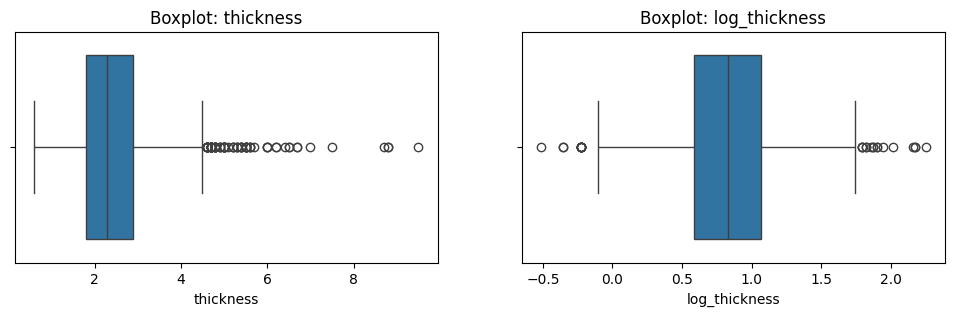

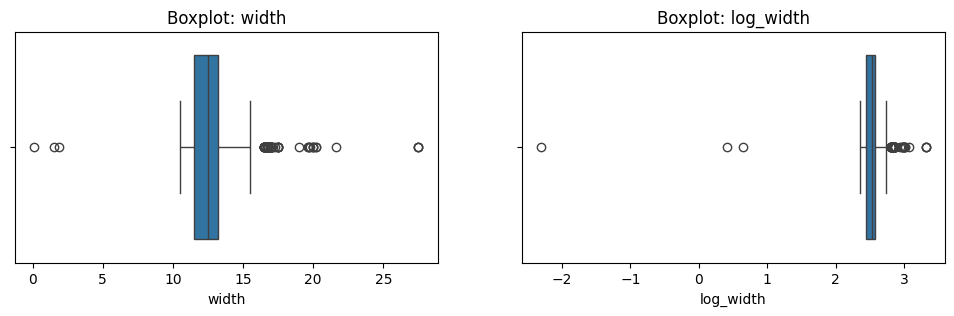

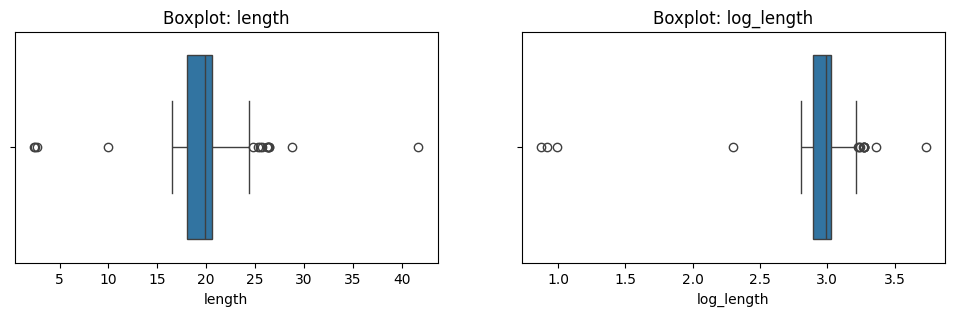

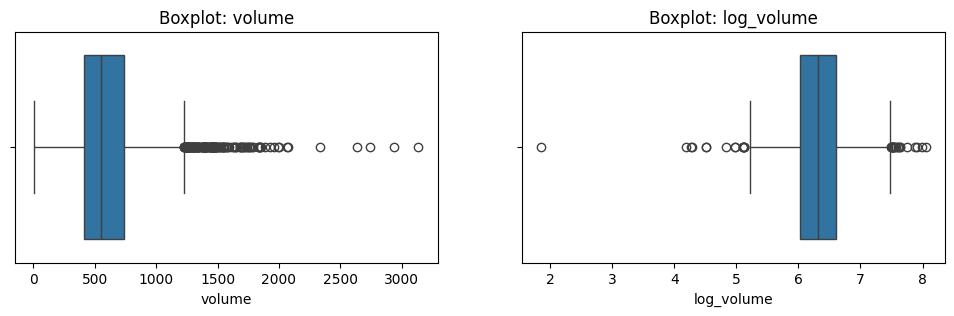

In [121]:
for col, log_col in zip(numeric_cols, log_numeric_cols):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

    sns.boxplot(x=df[col], orient='h', ax=ax[0])
    sns.boxplot(x=df[log_col], orient='h', ax=ax[1])

    ax[0].set_title(f'Boxplot: {col}')
    ax[1].set_title(f'Boxplot: {log_col}')

### Корреляционная матрица

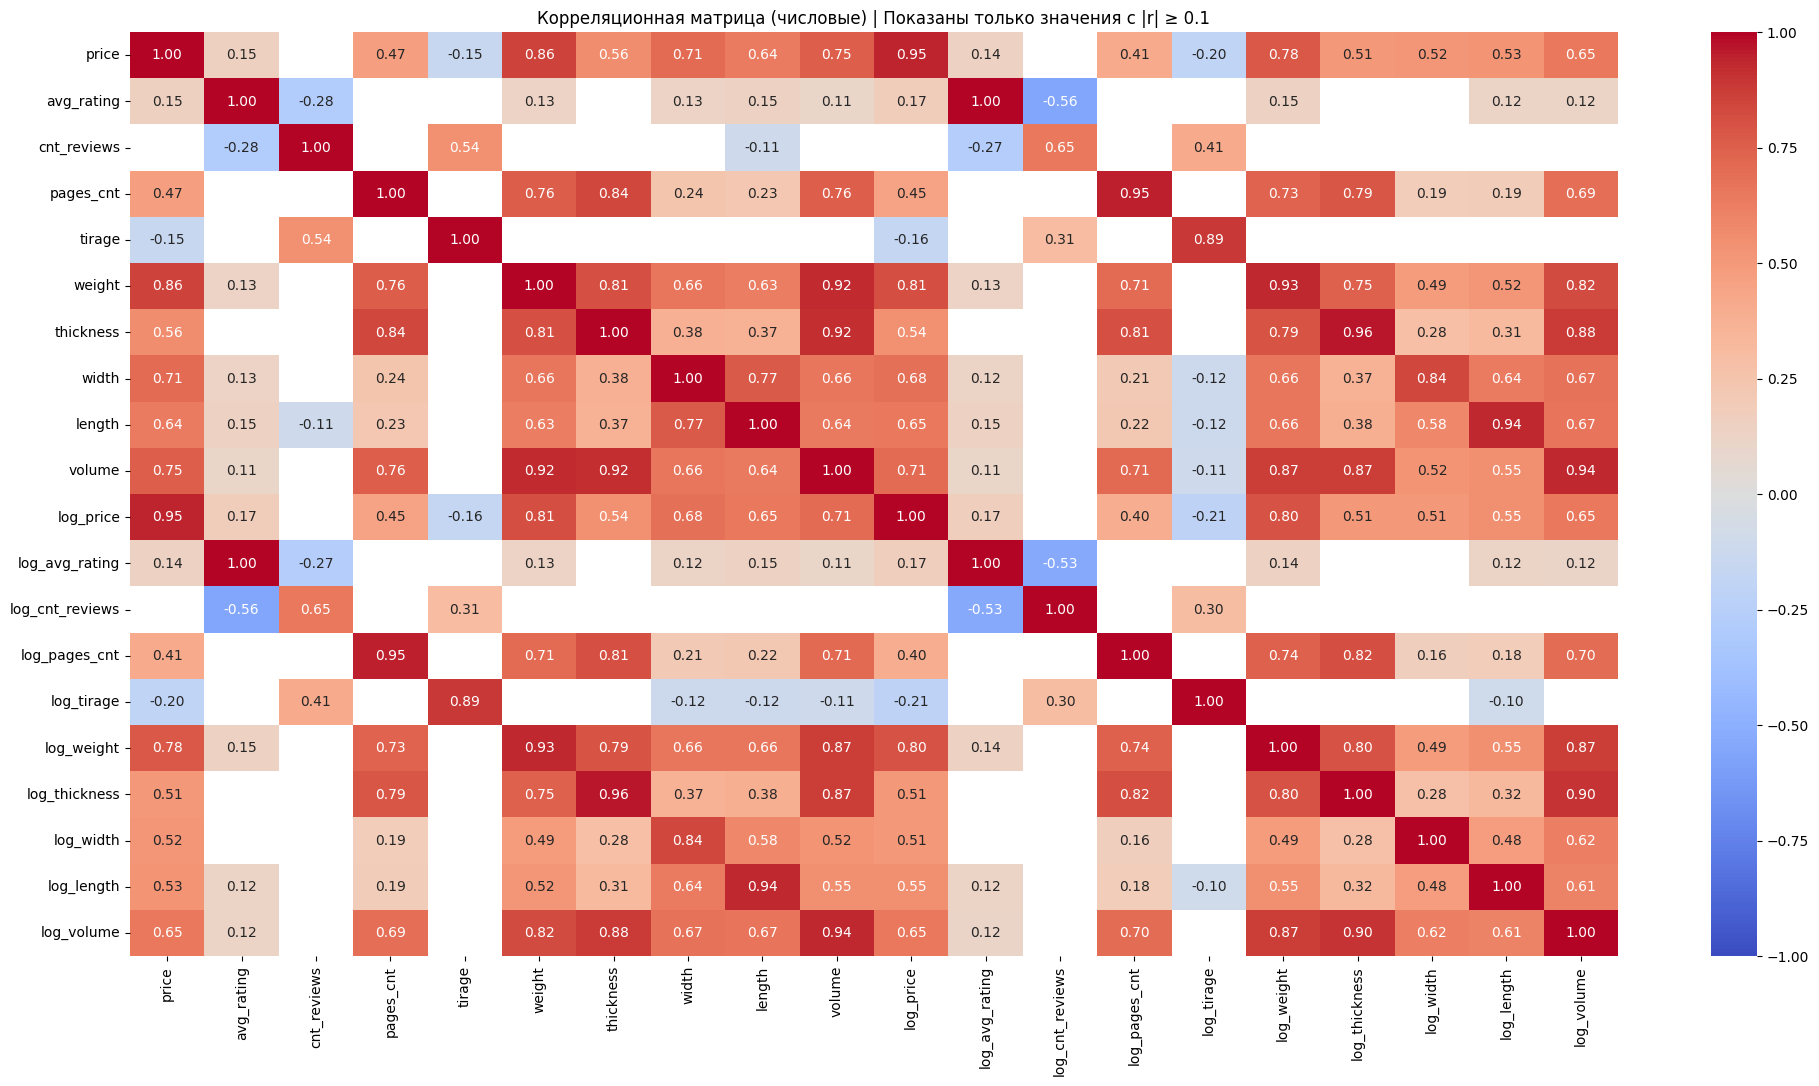

In [122]:
# Вычисляем матрицу корреляций
corr_matrix = df[numeric_cols + log_numeric_cols].corr()

# Создаем маску для незначительных значений
mask = np.abs(corr_matrix) < 0.1

plt.figure(figsize=(24, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,          
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=-1, 
    vmax=1,
)
plt.title('Корреляционная матрица (числовые) | Показаны только значения с |r| ≥ 0.1')
plt.show()

### Корреляционная матрица для всех признаков

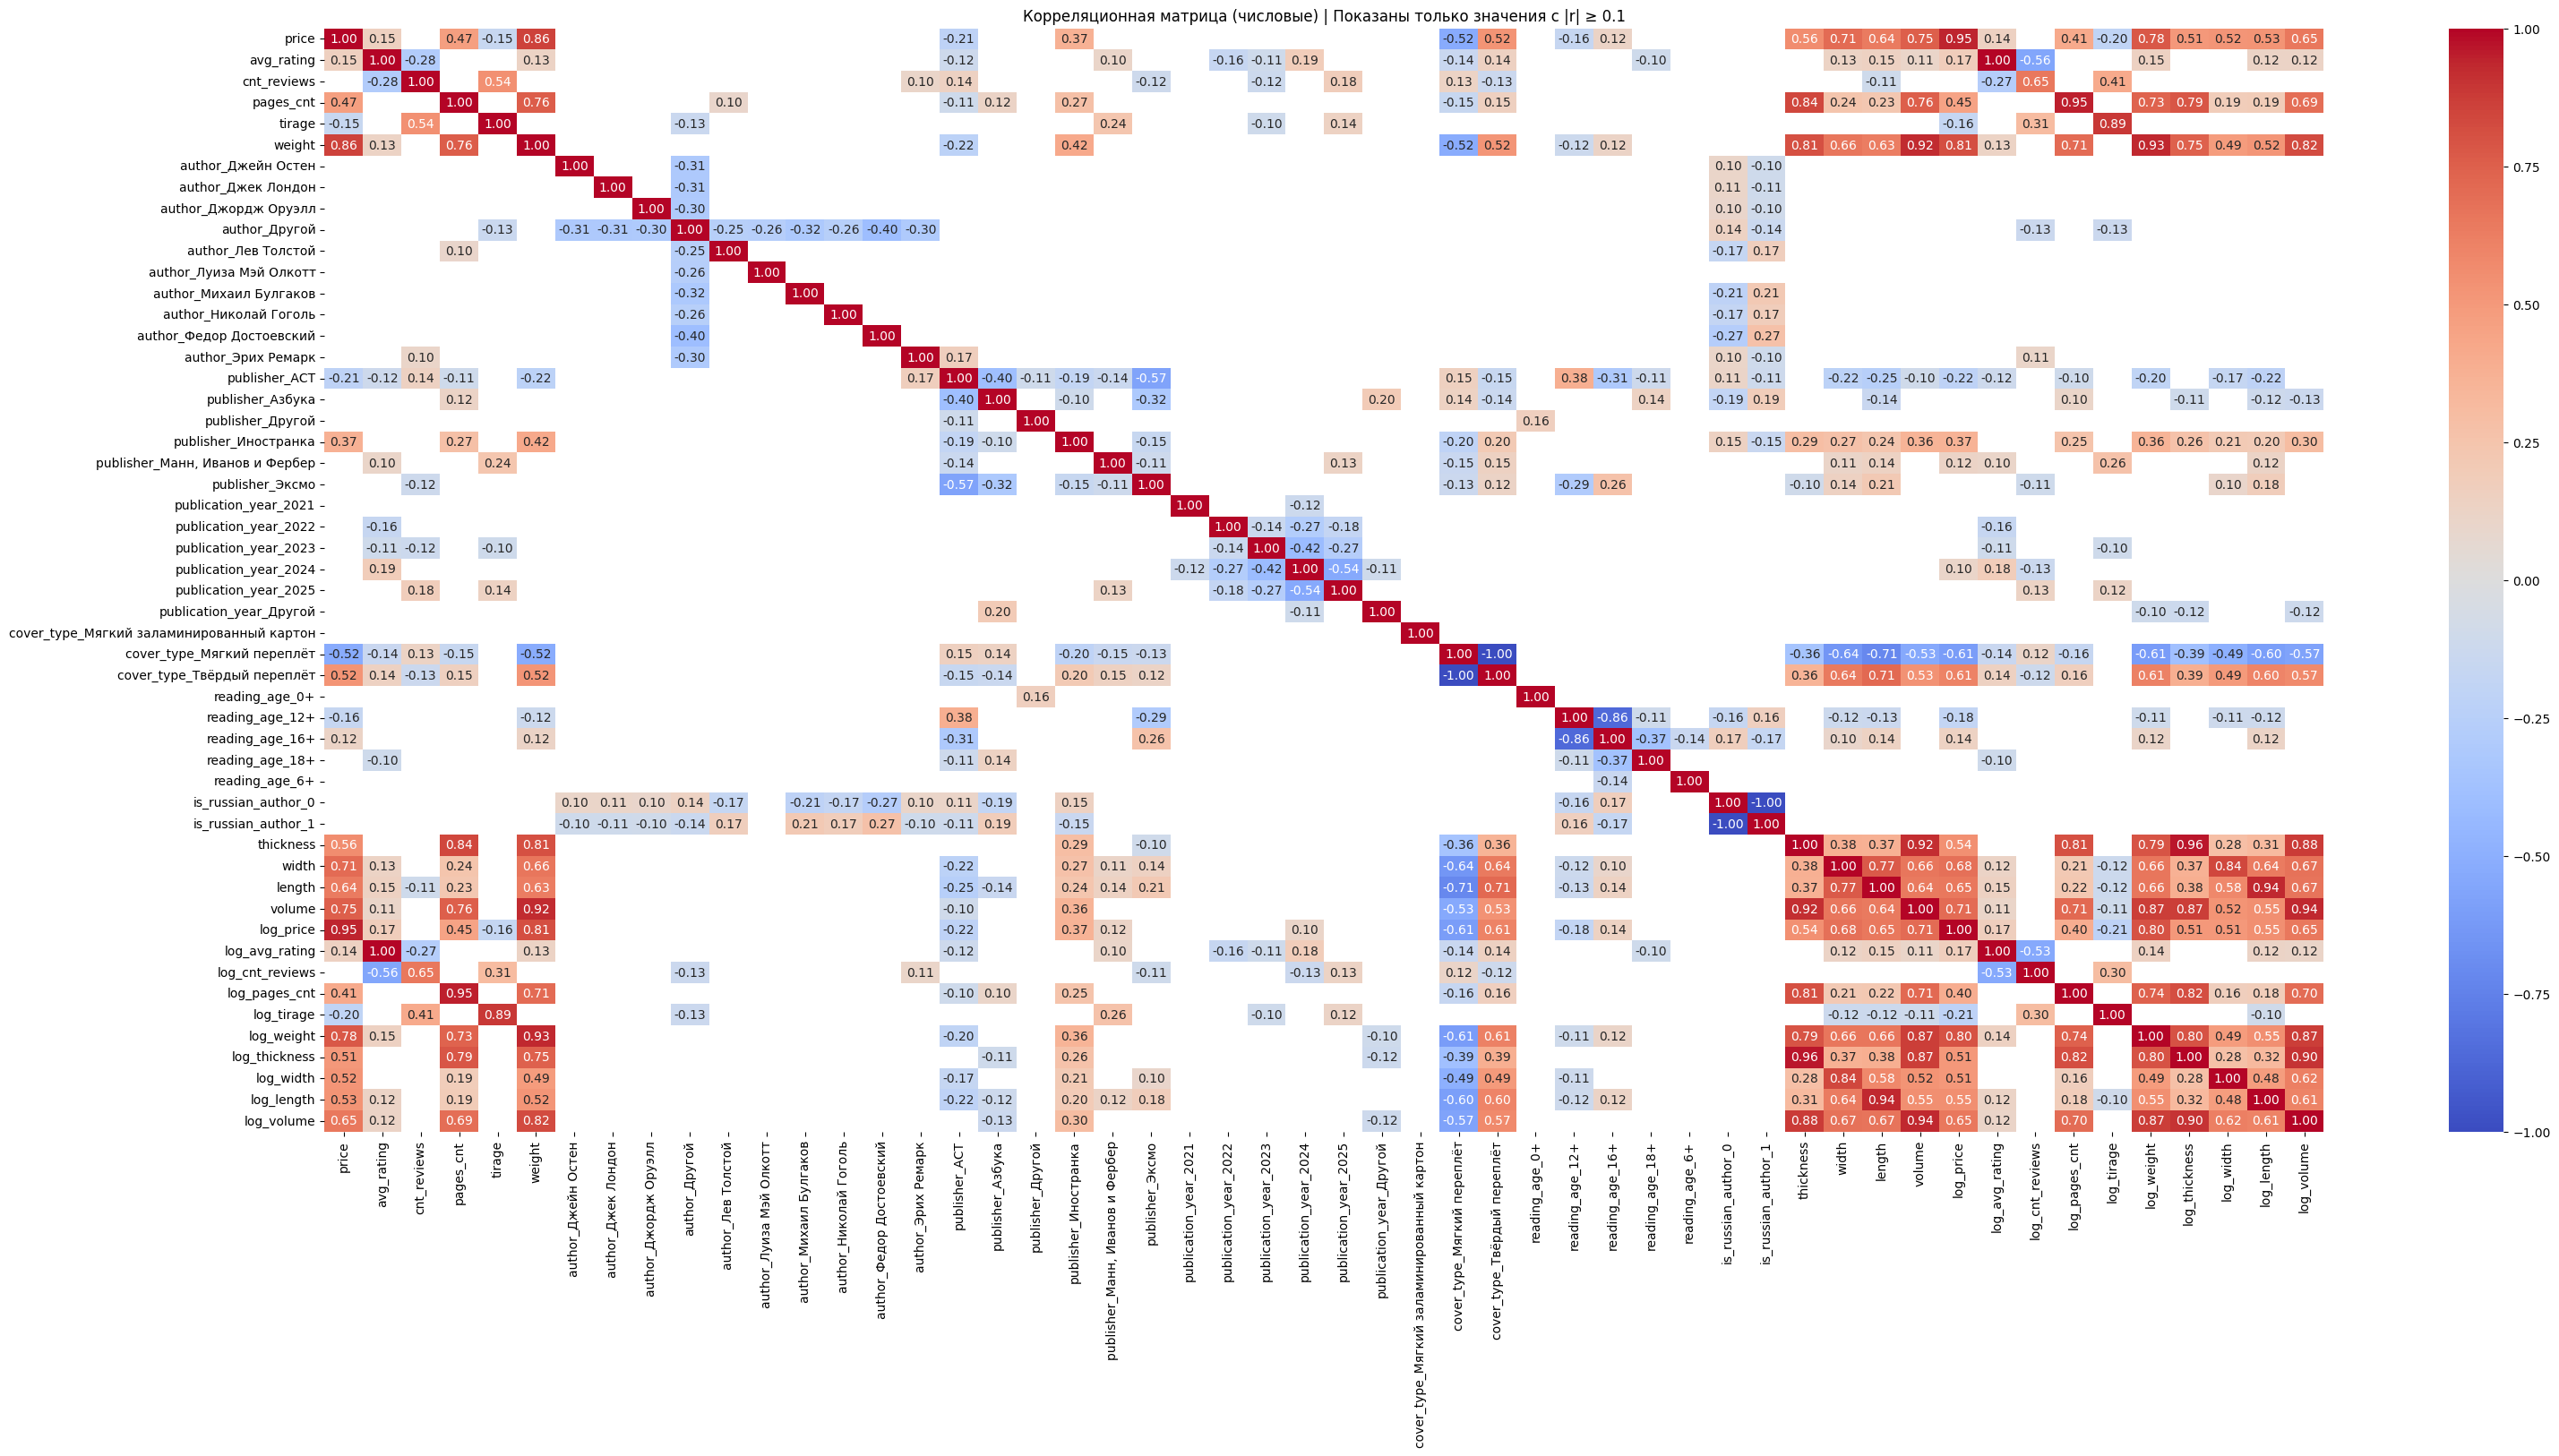

In [133]:
# Вычисляем матрицу корреляций
corr_matrix = df.corr()

# Создаем маску для незначительных значений
mask = np.abs(corr_matrix) < 0.1

plt.figure(figsize=(36, 16))
sns.heatmap(
    corr_matrix,
    mask=mask,          
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=-1, 
    vmax=1,
)
plt.title('Корреляционная матрица (числовые) | Показаны только значения с |r| ≥ 0.1')
plt.show()

### Зависимость цены от числового признака

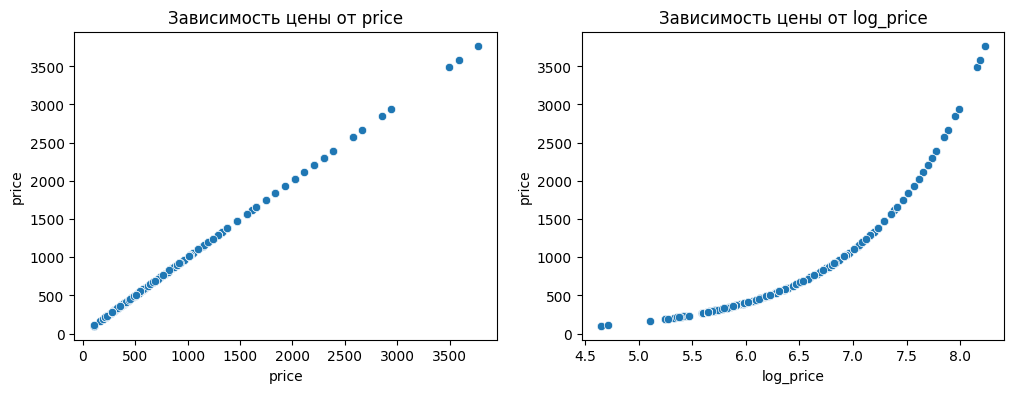

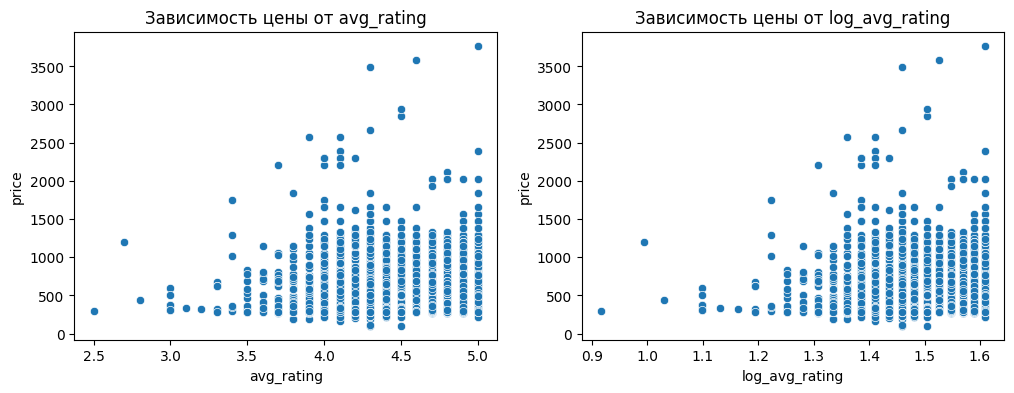

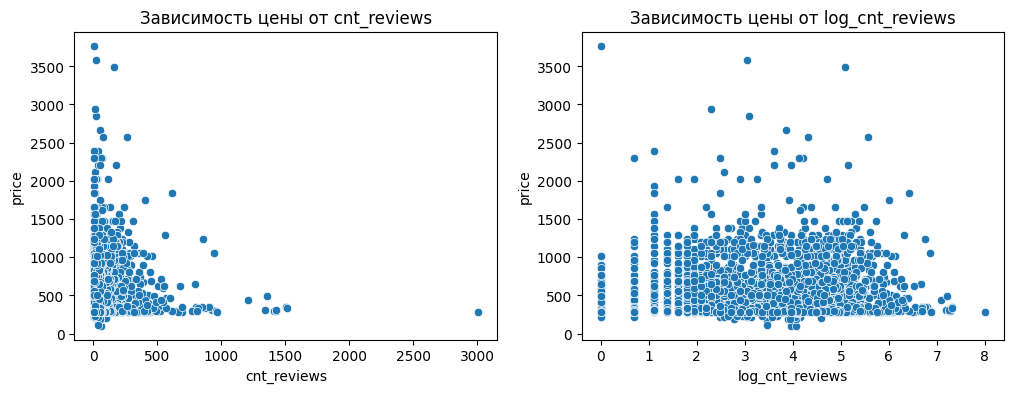

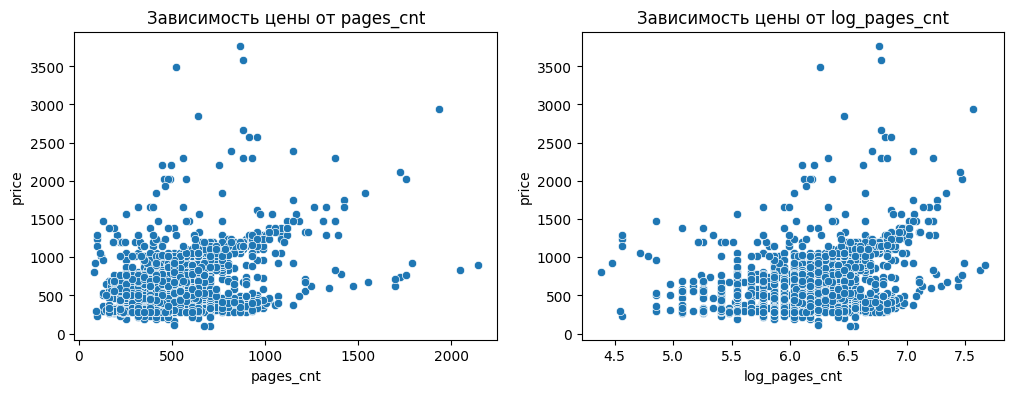

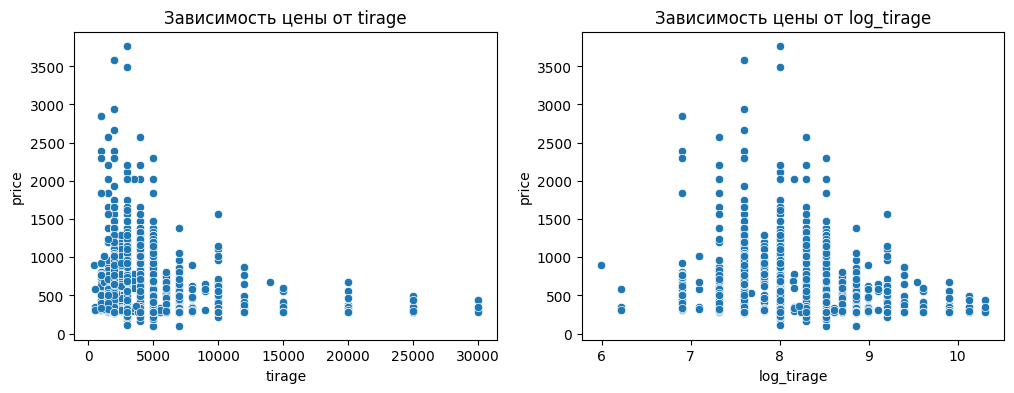

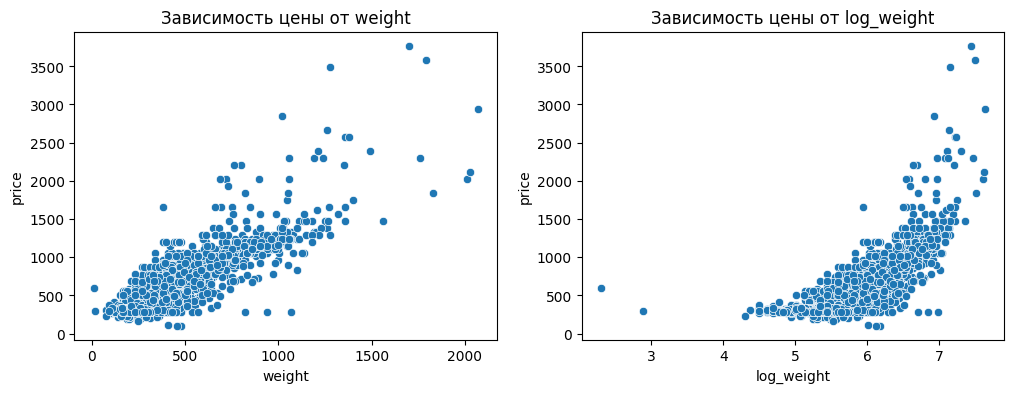

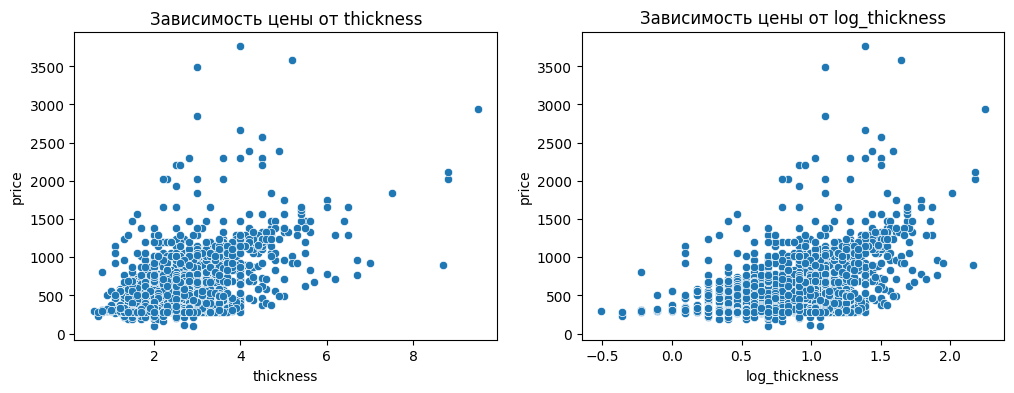

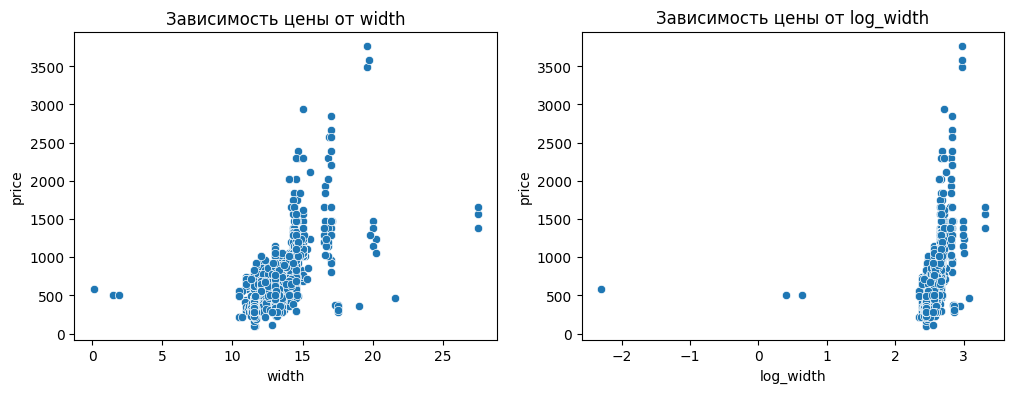

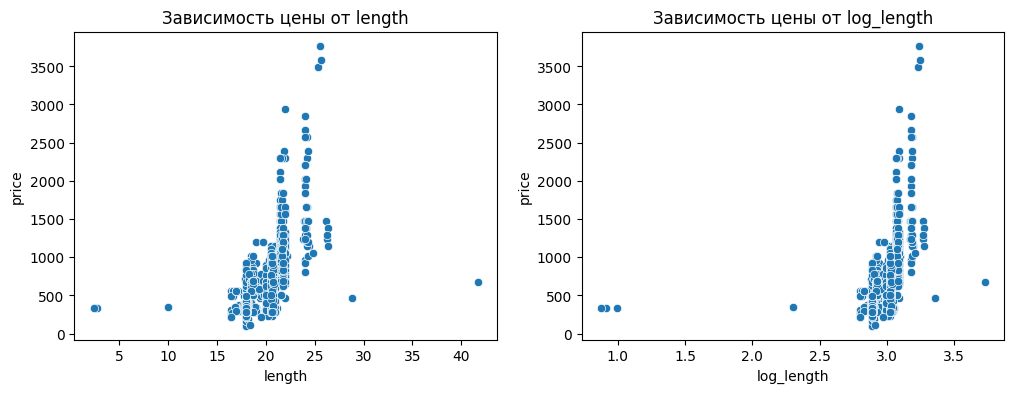

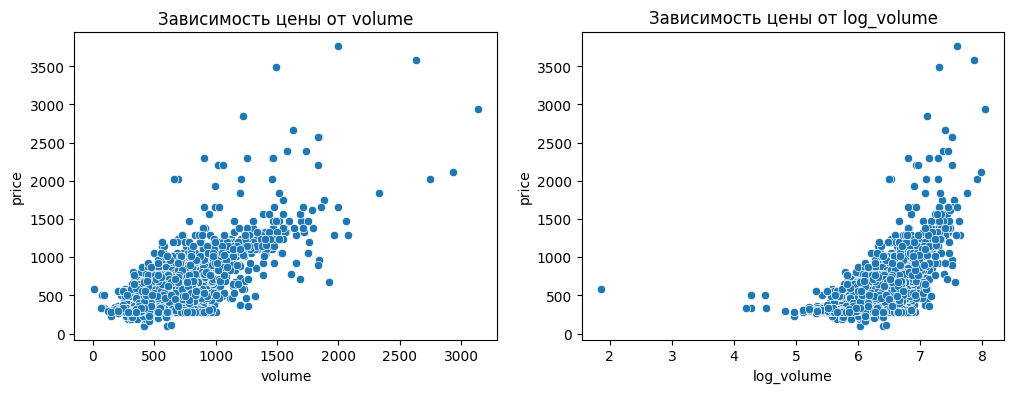

In [123]:
# Зависимость цены от числового признака
for col, log_col in zip(numeric_cols, log_numeric_cols):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    ax[0].set_title(f'Зависимость цены от {col}')
    sns.scatterplot(data=df, x=col, y='price', ax=ax[0])

    ax[1].set_title(f'Зависимость цены от {log_col}')
    sns.scatterplot(data=df, x=log_col, y='price', ax=ax[1])

    plt.show()

### Зависимость логарифма цены от числового признака

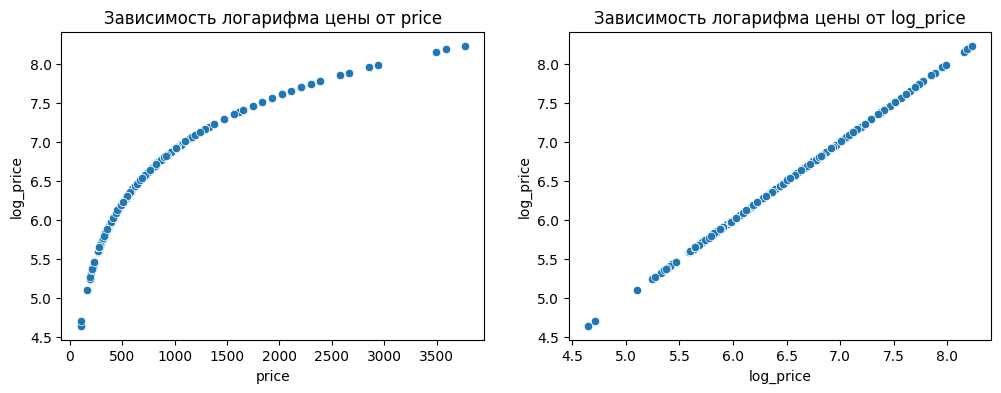

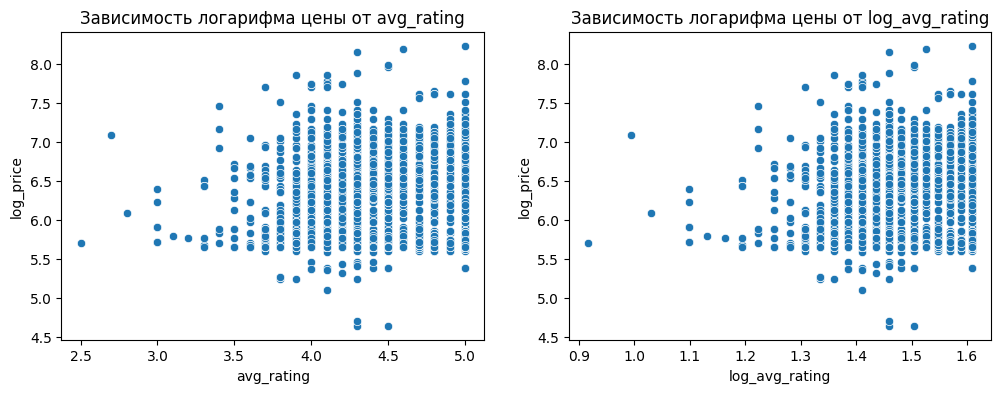

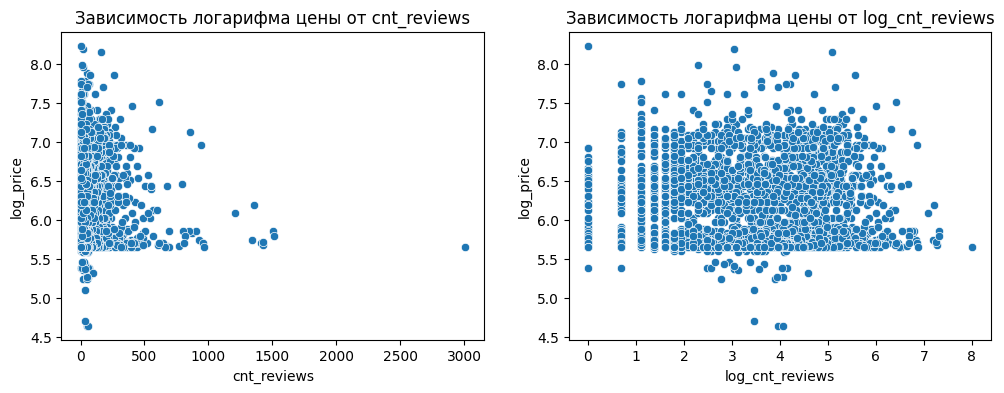

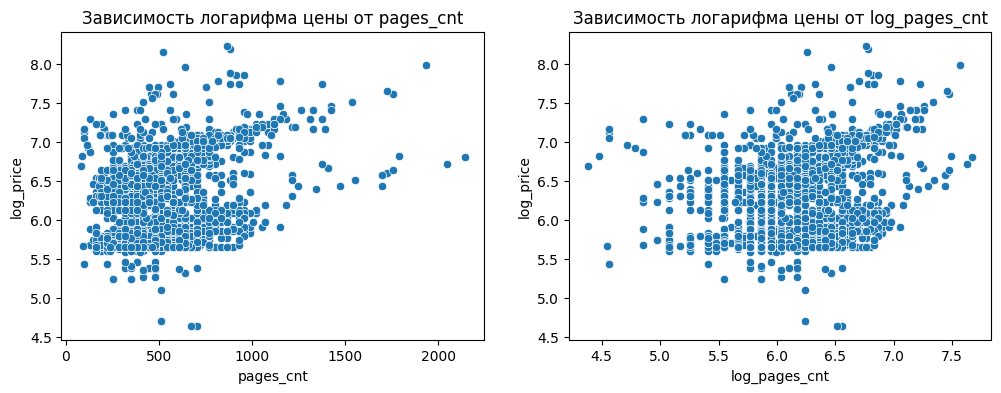

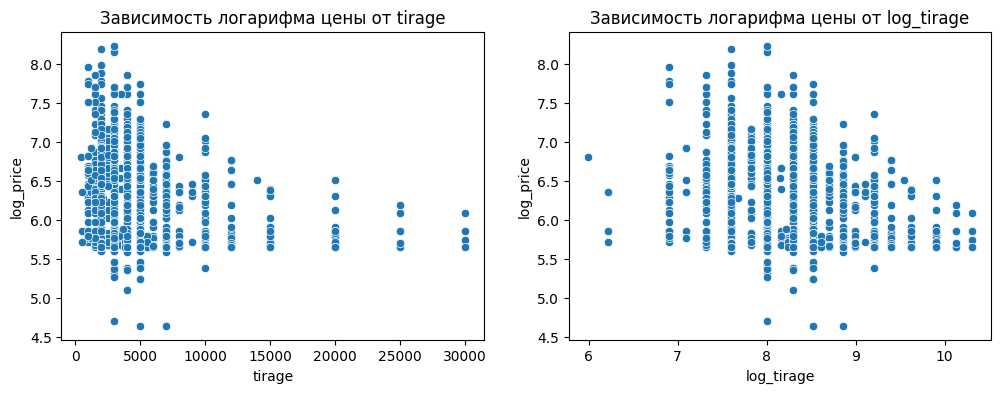

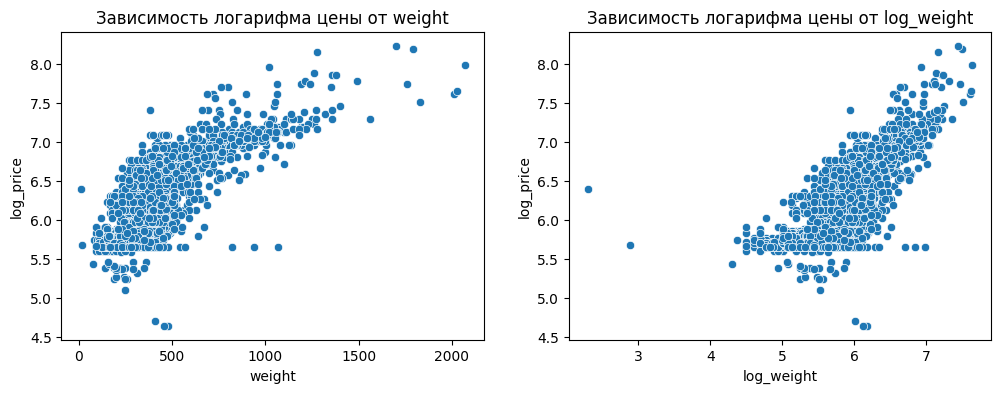

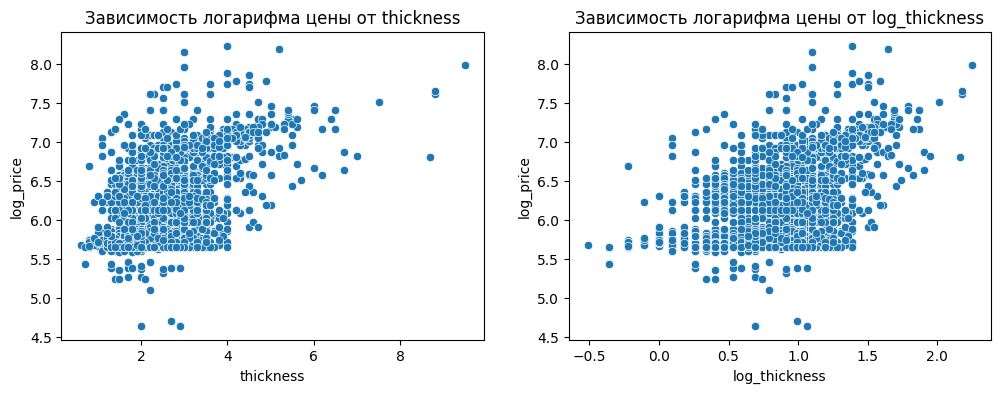

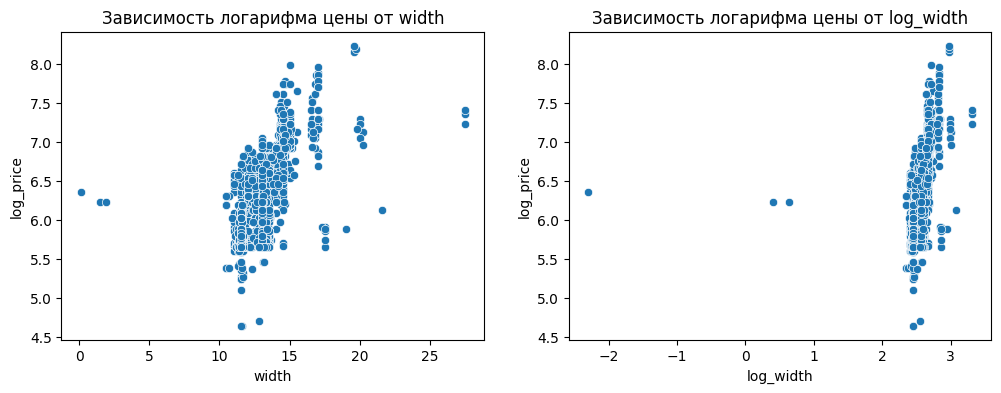

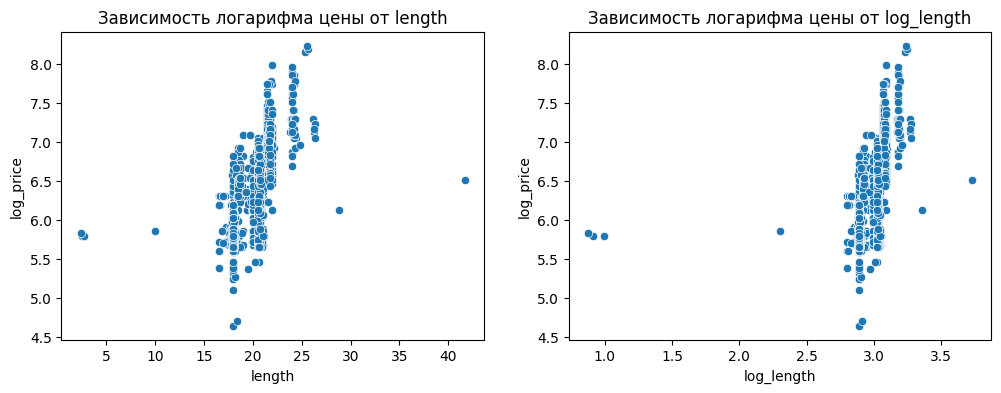

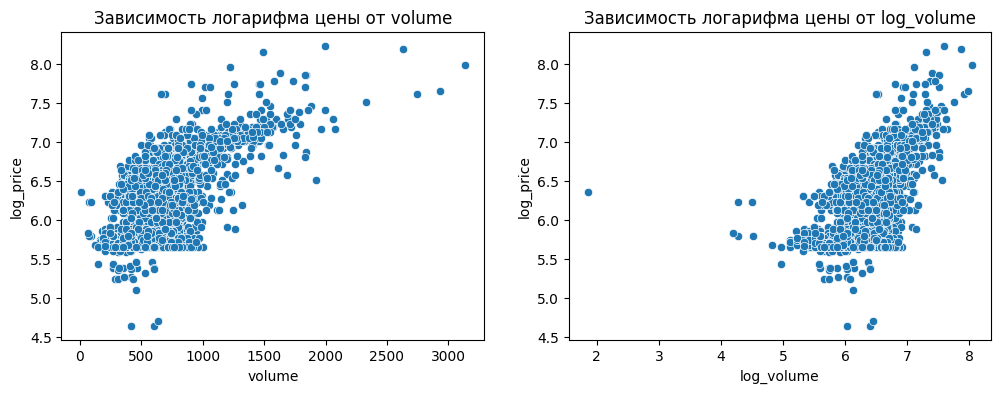

In [124]:
for col, log_col in zip(numeric_cols, log_numeric_cols):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    ax[0].set_title(f'Зависимость логарифма цены от {col}')
    sns.scatterplot(data=df, x=col, y='log_price', ax=ax[0])

    ax[1].set_title(f'Зависимость логарифма цены от {log_col}')
    sns.scatterplot(data=df, x=log_col, y='log_price', ax=ax[1])

    plt.show()

### Распределение цены от категориальных признаков

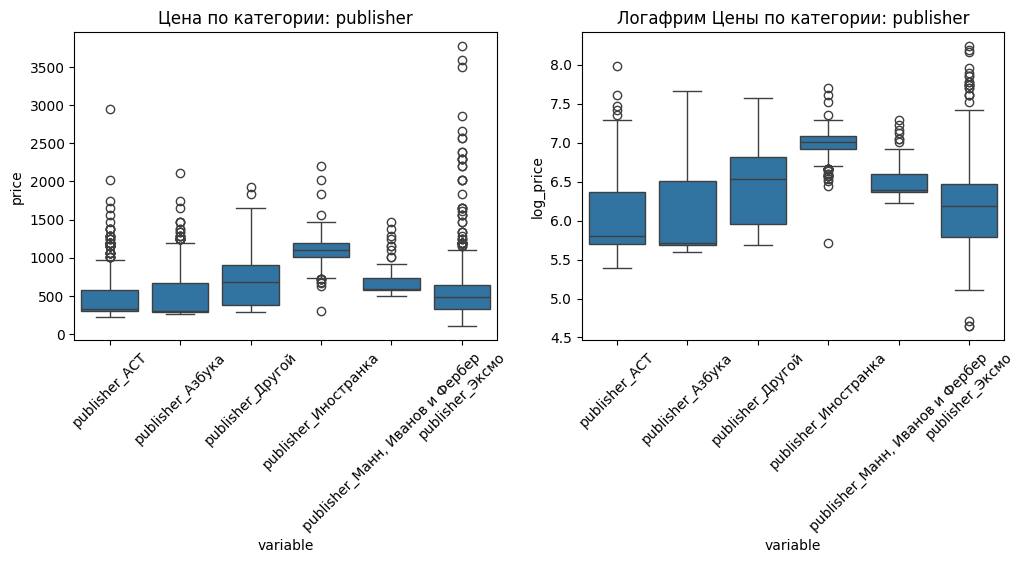

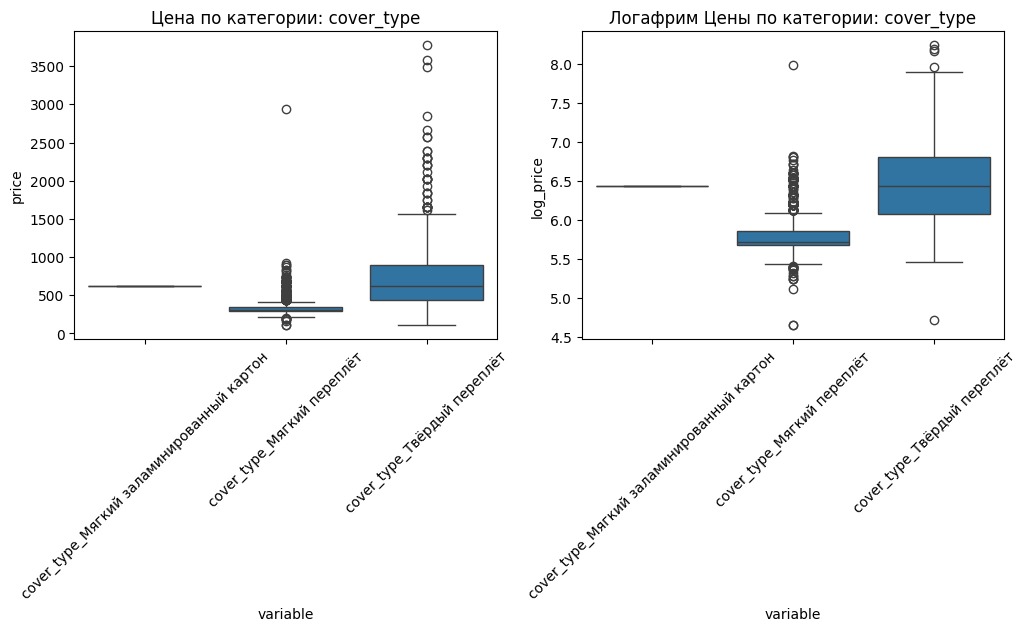

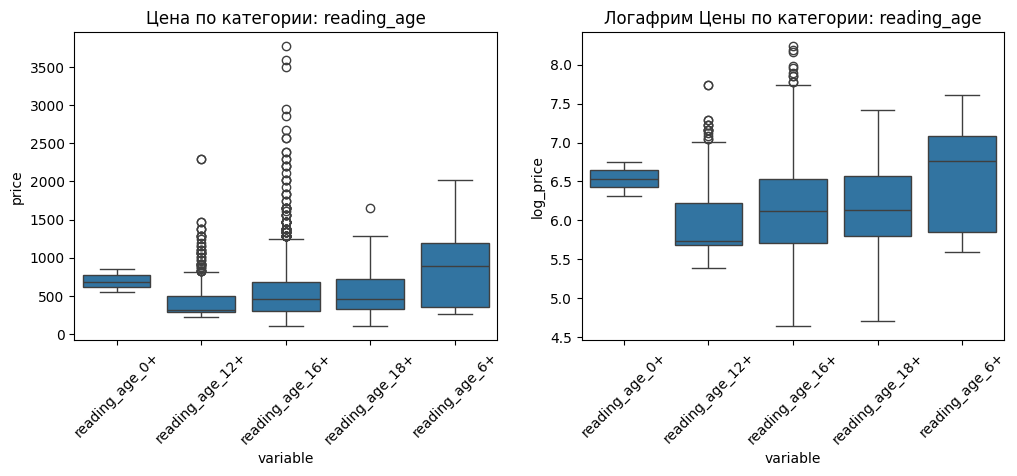

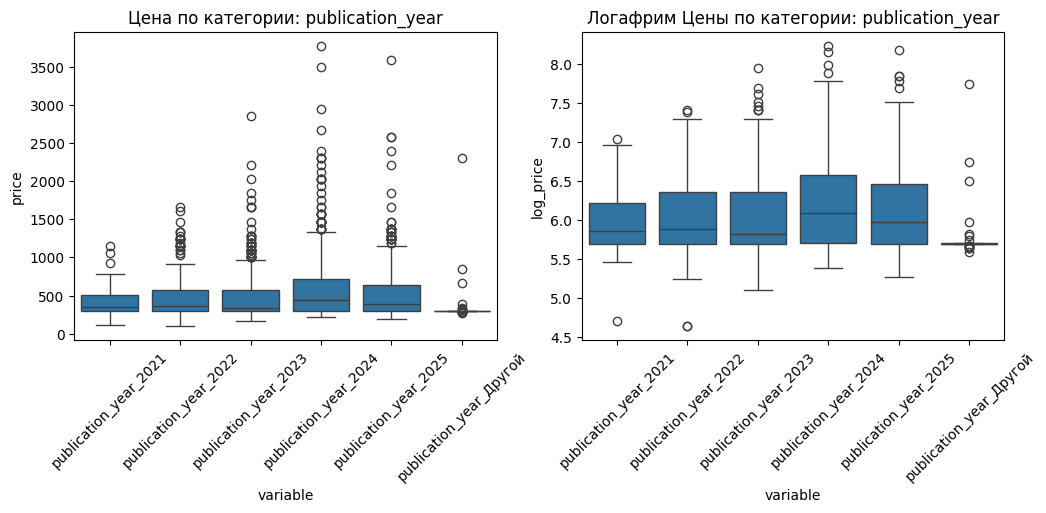

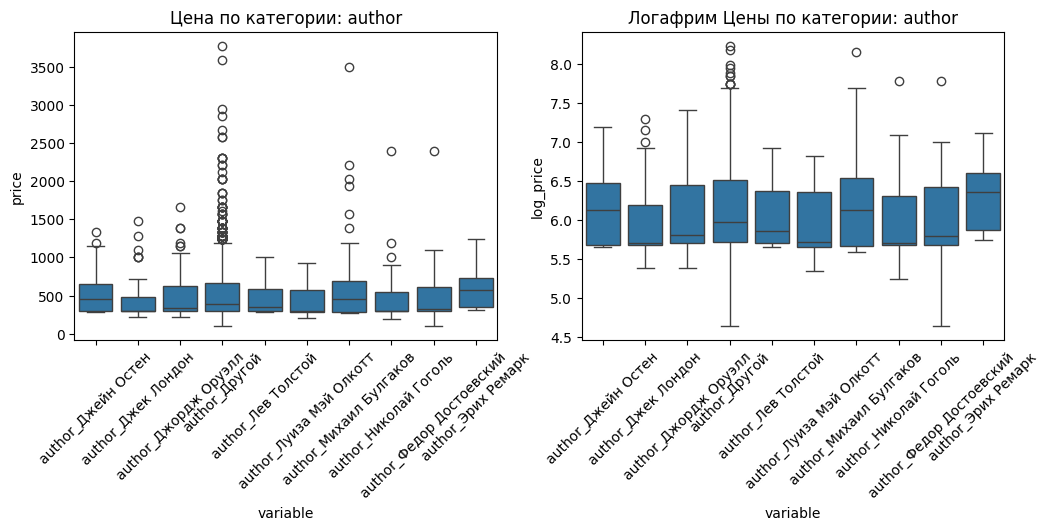

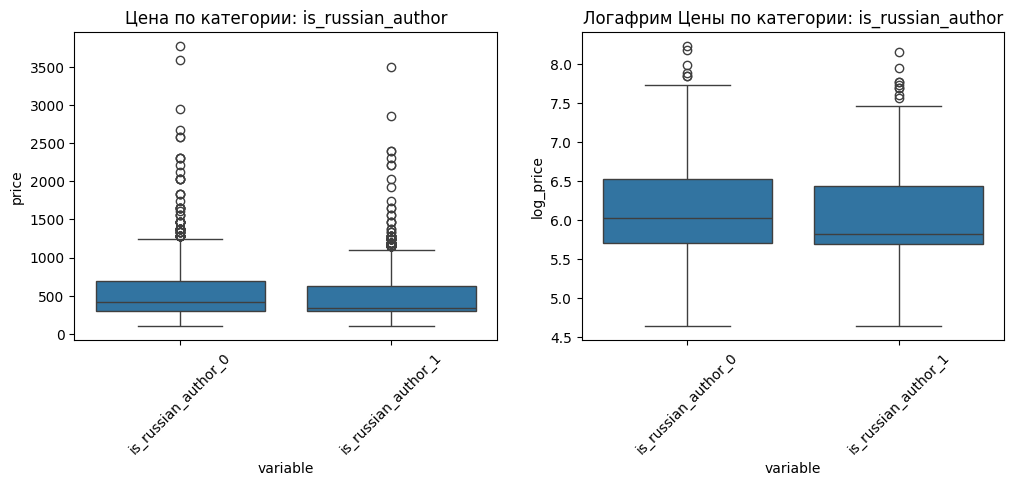

In [125]:
cat_cols = [
    [c for c in df.columns if c.startswith('publisher_')], 
    [c for c in df.columns if c.startswith('cover_type_')],
    [c for c in df.columns if c.startswith('reading_age_')],
    [c for c in df.columns if c.startswith('publication_year_')],
    [c for c in df.columns if c.startswith('author_')],
    [c for c in df.columns if c.startswith('is_russian_author')]
]
for cols in cat_cols:
    df_melt = df[cols + ['price']].melt(id_vars='price')
    df_melt = df_melt[df_melt['value'] == 1]

    df_melt_log = df[cols + ['log_price']].melt(id_vars='log_price')
    df_melt_log = df_melt_log[df_melt_log['value'] == 1]
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.boxplot(x='variable', y='price', data=df_melt, ax=ax[0])
    sns.boxplot(x='variable', y='log_price', data=df_melt_log, ax=ax[1])

    ax[0].tick_params(axis='x', rotation=45)
    ax[1].tick_params(axis='x', rotation=45)

    ax[0].set_title(f'Цена по категории: {"_".join(cols[0].split("_")[:-1])}')
    ax[1].set_title(f'Логафрим Цены по категории: {"_".join(cols[0].split("_")[:-1])}')

### Анализ топовых авторов

In [126]:
author_cols = [c for c in df.columns if c.startswith('author_')]
for c in author_cols:
    nm = c.split("_",1)[1]
    mean_price = df[df[c]==1]['price'].mean()
    print(f"Автор: {nm:40s} | N = {df[c].sum():4.0f} | Сред. цена: {mean_price:7.0f} руб.")

Автор: Джейн Остен                              | N =   68 | Сред. цена:     521 руб.
Автор: Джек Лондон                              | N =   69 | Сред. цена:     433 руб.
Автор: Джордж Оруэлл                            | N =   64 | Сред. цена:     536 руб.
Автор: Другой                                   | N = 2597 | Сред. цена:     542 руб.
Автор: Лев Толстой                              | N =   46 | Сред. цена:     459 руб.
Автор: Луиза Мэй Олкотт                         | N =   48 | Сред. цена:     429 руб.
Автор: Михаил Булгаков                          | N =   71 | Сред. цена:     623 руб.
Автор: Николай Гоголь                           | N =   47 | Сред. цена:     482 руб.
Автор: Федор Достоевский                        | N =  114 | Сред. цена:     466 руб.
Автор: Эрих Ремарк                              | N =   66 | Сред. цена:     582 руб.


### Зависимость цены от объема в разрезе по типу обложки

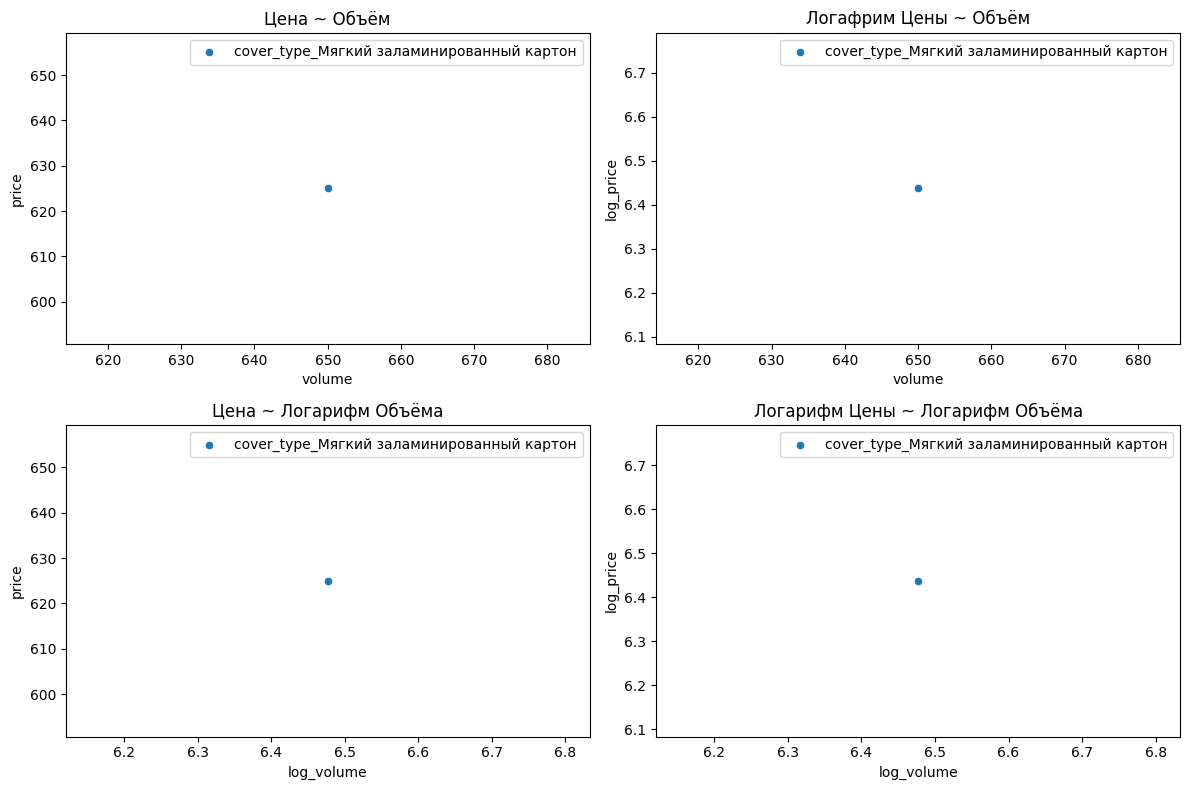

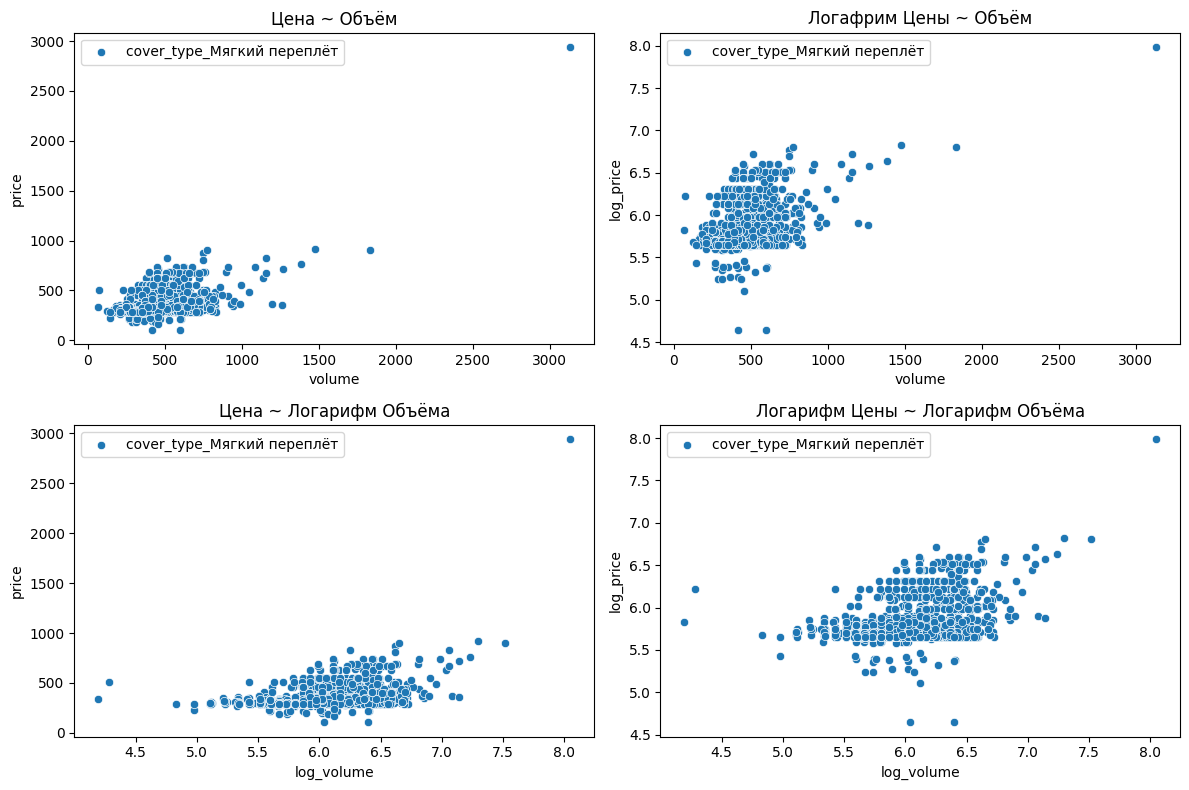

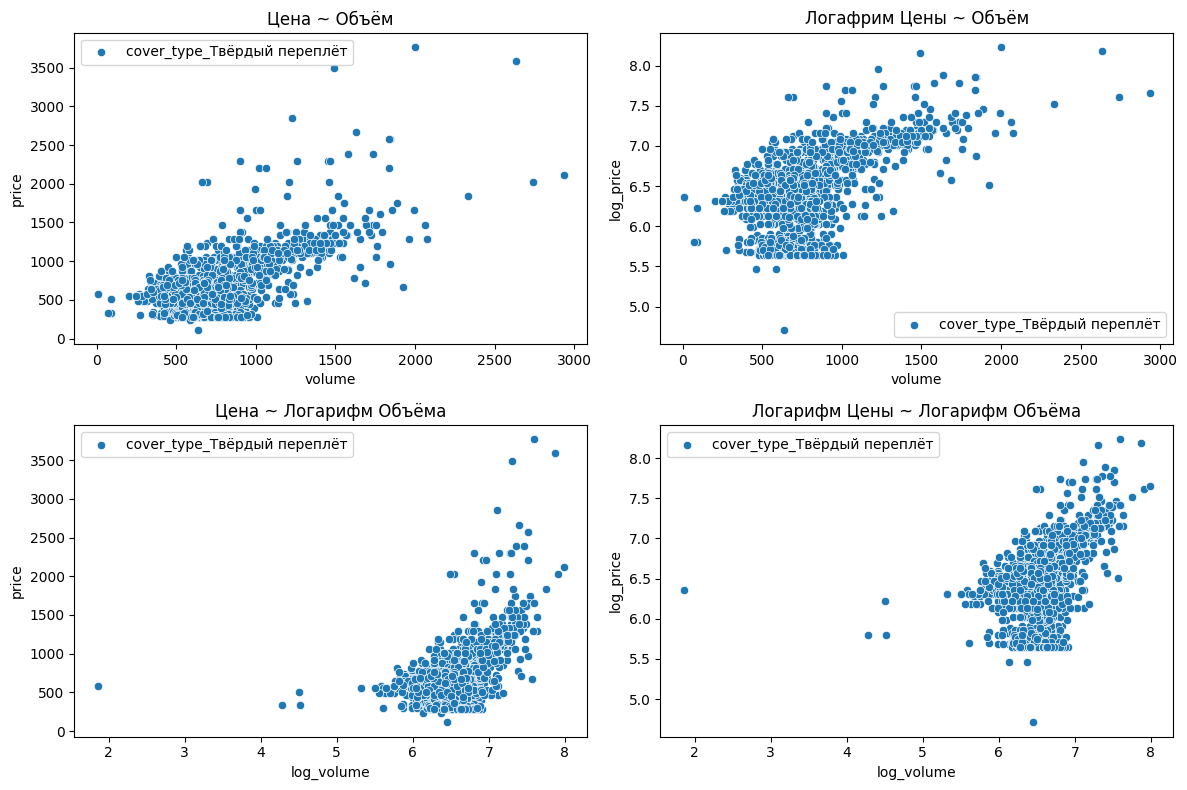

In [127]:
cover_cols = [c for c in df.columns if c.startswith('cover_type_')]
for cover in cover_cols:
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    sns.scatterplot(x='volume', y='price', data=df[df[cover]==1], label=cover, ax=ax[0, 0])
    sns.scatterplot(x='volume', y='log_price', data=df[df[cover]==1], label=cover, ax=ax[0, 1])

    sns.scatterplot(x='log_volume', y='price', data=df[df[cover]==1], label=cover, ax=ax[1, 0])
    sns.scatterplot(x='log_volume', y='log_price', data=df[df[cover]==1], label=cover, ax=ax[1, 1])

    ax[0, 0].set_title(f"Цена ~ Объём")
    ax[0, 1].set_title(f"Логафрим Цены ~ Объём")

    ax[1, 0].set_title(f"Цена ~ Логарифм Объёма")
    ax[1, 1].set_title(f"Логарифм Цены ~ Логарифм Объёма")

    plt.tight_layout()

    # ax[0, 0].set_xlim(xmin=0, xmax = df[df[cover]==1]['volume'].quantile(0.99))
    # ax[1, 1].set_ylim(ymin=0, ymax = df[df[cover]==1]['price'].quantile(0.99))

    # ax[0, 1].set_xlim(xmin=0, xmax = df[df[cover]==1]['volume'].quantile(0.99))
    # ax[0, 1].set_ylim(ymin=0, ymax = df[df[cover]==1]['log_price'].quantile(0.99))

    # ax[1, 0].set_xlim(xmin=0, xmax = df[df[cover]==1]['log_volume'].quantile(0.99))
    # ax[1, 0].set_ylim(ymin=0, ymax = df[df[cover]==1]['price'].quantile(0.99))

    # ax[1, 1].set_xlim(xmin=0, xmax = df[df[cover]==1]['log_volume'].quantile(0.99))
    # ax[1, 1].set_ylim(ymin=0, ymax = df[df[cover]==1]['log_price'].quantile(0.99))
    
    plt.show()

### Топ дорогих и дешевых книг

In [129]:
print("ТОП-10 по цене:")
display(df[['publisher_АСТ','publisher_Азбука', 'publisher_Иностранка', 'publisher_Манн, Иванов и Фербер', 'publisher_Эксмо'] + numeric_cols].sort_values('price', ascending=False).head(10))

print("ТОП-10 по цене с конца:")
display(df[['publisher_АСТ','publisher_Азбука', 'publisher_Иностранка', 'publisher_Манн, Иванов и Фербер', 'publisher_Эксмо'] + numeric_cols].sort_values('price', ascending=False).tail(10))

ТОП-10 по цене:


,publisher_АСТ,publisher_Азбука,publisher_Иностранка,"publisher_Манн, Иванов и Фербер",publisher_Эксмо,price,avg_rating,cnt_reviews,pages_cnt,tirage,weight,thickness,width,length,volume
2287,0.0,0.0,0.0,0.0,1.0,3771,5.0,1,864,3000,1700.0,4.0,19.6,25.5,1999.200
652,0.0,0.0,0.0,0.0,1.0,3587,4.6,21,880,2000,1790.0,5.2,19.7,25.7,2632.708
510,0.0,0.0,0.0,0.0,1.0,3495,4.3,163,520,3000,1279.0,3.0,19.6,25.3,1487.640
2753,1.0,0.0,0.0,0.0,0.0,2943,4.5,10,1936,2000,2070.0,9.5,15.0,22.0,3135.000
2405,0.0,0.0,0.0,0.0,1.0,2851,4.5,22,640,1000,1019.0,3.0,17.0,24.0,1224.000
921,0.0,0.0,0.0,0.0,1.0,2667,4.3,47,880,2000,1260.0,4.0,17.0,24.0,1632.000
708,0.0,0.0,0.0,0.0,1.0,2575,3.9,261,912,4000,1360.0,4.5,16.9,24.2,1840.410
2065,0.0,0.0,0.0,0.0,1.0,2575,4.1,75,960,1500,1379.0,4.5,17.0,24.0,1836.000
1876,0.0,0.0,0.0,0.0,1.0,2391,4.1,37,1152,1000,1490.0,4.9,14.7,21.9,1577.457
2849,0.0,0.0,0.0,0.0,1.0,2391,5.0,3,816,2000,1212.0,4.2,17.0,24.3,1735.020


ТОП-10 по цене с конца:


,publisher_АСТ,publisher_Азбука,publisher_Иностранка,"publisher_Манн, Иванов и Фербер",publisher_Эксмо,price,avg_rating,cnt_reviews,pages_cnt,tirage,weight,thickness,width,length,volume
1860,0.0,0.0,0.0,0.0,1.0,205,4.2,99,640,3000,310.0,2.5,11.7,18.0,526.500
2708,0.0,0.0,0.0,0.0,1.0,195,3.8,51,416,3000,202.0,1.7,11.7,18.2,361.998
1674,0.0,0.0,0.0,0.0,1.0,195,3.8,58,480,3000,240.0,2.0,11.5,18.0,414.000
1792,0.0,0.0,0.0,0.0,1.0,189,4.3,16,352,5000,260.0,1.5,11.5,18.0,310.500
2181,0.0,0.0,0.0,0.0,1.0,189,3.9,49,352,5000,246.0,2.1,11.5,18.0,434.700
1043,0.0,0.0,0.0,0.0,1.0,189,3.8,49,256,5000,190.0,1.4,11.5,18.0,289.800
2279,0.0,0.0,0.0,0.0,1.0,165,4.1,32,512,4000,250.0,2.2,11.5,18.0,455.400
2972,0.0,0.0,0.0,0.0,1.0,111,4.3,32,512,3000,409.0,2.7,12.8,18.4,635.904
770,0.0,0.0,0.0,0.0,1.0,104,4.5,53,704,7000,480.0,2.0,11.6,18.0,417.600
787,0.0,0.0,0.0,0.0,1.0,104,4.3,58,672,5000,458.0,2.9,11.5,18.0,600.300


### Pairplot для быстрых выводов

In [130]:
# sns.pairplot(df);